## Korean_food Multi Label Classification
- 폴더에서 데이터 읽기

In [1]:
import os
import zipfile
from zipfile import ZipFile
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
# 데이터 종류별 폴더
data_dir='c:/data/kfood'

### masterCategory, subCategory, image_ID 정보를 담은 csv 파일 생성

In [3]:
from glob import glob
root='c:/data/kfood/*'
folders=glob(root)

dataList=[]

for folder in folders:
    subfolderList=glob(folder + '/*')
    # print(subfolderList)
    for subfolder in subfolderList:
        fileList=glob(subfolder + '/*.jpg')
        # print(fileList)
        dataList.append(fileList)
        # print(dataList)

In [4]:
df=pd.DataFrame(dataList)
# df.info()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,c:/data/kfood\구이\갈비구이\Img_000_0000.jpg,c:/data/kfood\구이\갈비구이\Img_000_0001.jpg,c:/data/kfood\구이\갈비구이\Img_000_0002.jpg,c:/data/kfood\구이\갈비구이\Img_000_0003.jpg,c:/data/kfood\구이\갈비구이\Img_000_0004.jpg,c:/data/kfood\구이\갈비구이\Img_000_0005.jpg,c:/data/kfood\구이\갈비구이\Img_000_0006.jpg,c:/data/kfood\구이\갈비구이\Img_000_0007.jpg,c:/data/kfood\구이\갈비구이\Img_000_0008.jpg,c:/data/kfood\구이\갈비구이\Img_000_0009.jpg,...,c:/data/kfood\구이\갈비구이\Img_000_0992.jpg,c:/data/kfood\구이\갈비구이\Img_000_0993.JPG,c:/data/kfood\구이\갈비구이\Img_000_0994.JPG,c:/data/kfood\구이\갈비구이\Img_000_0995.JPG,c:/data/kfood\구이\갈비구이\Img_000_0996.jpg,c:/data/kfood\구이\갈비구이\Img_000_0997.jpg,c:/data/kfood\구이\갈비구이\Img_000_0998.jpg,c:/data/kfood\구이\갈비구이\Img_000_0999.jpg,None,None
1,c:/data/kfood\구이\곱창구이\Img_003_0000.jpg,c:/data/kfood\구이\곱창구이\Img_003_0001.jpg,c:/data/kfood\구이\곱창구이\Img_003_0002.jpg,c:/data/kfood\구이\곱창구이\Img_003_0003.jpg,c:/data/kfood\구이\곱창구이\Img_003_0004.jpg,c:/data/kfood\구이\곱창구이\Img_003_0005.jpg,c:/data/kfood\구이\곱창구이\Img_003_0006.jpg,c:/data/kfood\구이\곱창구이\Img_003_0007.jpg,c:/data/kfood\구이\곱창구이\Img_003_0008.jpg,c:/data/kfood\구이\곱창구이\Img_003_0009.jpg,...,c:/data/kfood\구이\곱창구이\Img_003_0990.jpg,c:/data/kfood\구이\곱창구이\Img_003_0991.jpg,c:/data/kfood\구이\곱창구이\Img_003_0992.jpg,c:/data/kfood\구이\곱창구이\Img_003_0993.jpg,c:/data/kfood\구이\곱창구이\Img_003_0994.jpg,c:/data/kfood\구이\곱창구이\Img_003_0995.jpg,c:/data/kfood\구이\곱창구이\Img_003_0996.jpg,c:/data/kfood\구이\곱창구이\Img_003_0997.jpg,c:/data/kfood\구이\곱창구이\Img_003_0998.jpg,c:/data/kfood\구이\곱창구이\Img_003_0999.jpg
2,c:/data/kfood\구이\닭갈비\Img_004_0000.jpg,c:/data/kfood\구이\닭갈비\Img_004_0001.JPG,c:/data/kfood\구이\닭갈비\Img_004_0002.JPG,c:/data/kfood\구이\닭갈비\Img_004_0003.JPG,c:/data/kfood\구이\닭갈비\Img_004_0004.JPG,c:/data/kfood\구이\닭갈비\Img_004_0005.jpg,c:/data/kfood\구이\닭갈비\Img_004_0006.jpg,c:/data/kfood\구이\닭갈비\Img_004_0007.jpg,c:/data/kfood\구이\닭갈비\Img_004_0008.JPG,c:/data/kfood\구이\닭갈비\Img_004_0009.JPG,...,c:/data/kfood\구이\닭갈비\Img_004_0994.jpg,c:/data/kfood\구이\닭갈비\Img_004_0995.jpg,c:/data/kfood\구이\닭갈비\Img_004_0996.jpg,c:/data/kfood\구이\닭갈비\Img_004_0997.jpg,c:/data/kfood\구이\닭갈비\Img_004_0998.jpg,c:/data/kfood\구이\닭갈비\Img_004_0999.jpg,None,None,None,None
3,c:/data/kfood\구이\삼겹살\Img_008_0000.jpg,c:/data/kfood\구이\삼겹살\Img_008_0001.jpg,c:/data/kfood\구이\삼겹살\Img_008_0002.jpg,c:/data/kfood\구이\삼겹살\Img_008_0003.jpg,c:/data/kfood\구이\삼겹살\Img_008_0004.jpg,c:/data/kfood\구이\삼겹살\Img_008_0005.jpg,c:/data/kfood\구이\삼겹살\Img_008_0006.jpg,c:/data/kfood\구이\삼겹살\Img_008_0007.jpg,c:/data/kfood\구이\삼겹살\Img_008_0008.jpg,c:/data/kfood\구이\삼겹살\Img_008_0009.jpg,...,c:/data/kfood\구이\삼겹살\Img_008_0998.jpg,c:/data/kfood\구이\삼겹살\Img_008_0999.jpg,None,None,None,None,None,None,None,None
4,c:/data/kfood\구이\조개구이\Img_010_0000.jpg,c:/data/kfood\구이\조개구이\Img_010_0001.jpg,c:/data/kfood\구이\조개구이\Img_010_0002.jpg,c:/data/kfood\구이\조개구이\Img_010_0003.jpg,c:/data/kfood\구이\조개구이\Img_010_0004.jpg,c:/data/kfood\구이\조개구이\Img_010_0005.jpg,c:/data/kfood\구이\조개구이\Img_010_0006.jpg,c:/data/kfood\구이\조개구이\Img_010_0007.jpg,c:/data/kfood\구이\조개구이\Img_010_0008.jpg,c:/data/kfood\구이\조개구이\Img_010_0009.jpg,...,c:/data/kfood\구이\조개구이\Img_010_0990.jpg,c:/data/kfood\구이\조개구이\Img_010_0991.jpg,c:/data/kfood\구이\조개구이\Img_010_0992.jpg,c:/data/kfood\구이\조개구이\Img_010_0993.jpg,c:/data/kfood\구이\조개구이\Img_010_0994.jpg,c:/data/kfood\구이\조개구이\Img_010_0995.jpg,c:/data/kfood\구이\조개구이\Img_010_0996.jpg,c:/data/kfood\구이\조개구이\Img_010_0997.jpg,c:/data/kfood\구이\조개구이\Img_010_0998.jpg,c:/data/kfood\구이\조개구이\Img_010_0999.jpg


In [5]:
# df1=df.iloc[0,:]
# df2=df.iloc[1,:]
# df1
# df1=pd.concat([df1, df2], axis = 0, ignore_index=True)
# df1

In [6]:
############################  데이터를 하나의 열로 합치기

# cc=df[0]
cc=df.iloc[:,0]
cc = pd.DataFrame(cc)
col=df.columns[1:]

for i in col:
    cc = pd.concat([cc, df[i]], ignore_index=True)

# for i in range(1, len(df.columns)):
#     cc = pd.concat([cc, df[i]])
cc

,0
0,c:/data/kfood\구이\갈비구이\Img_000_0000.jpg
1,c:/data/kfood\구이\곱창구이\Img_003_0000.jpg
2,c:/data/kfood\구이\닭갈비\Img_004_0000.jpg
3,c:/data/kfood\구이\삼겹살\Img_008_0000.jpg
4,c:/data/kfood\구이\조개구이\Img_010_0000.jpg
...,...
14995,None
14996,None
14997,None
14998,None


In [7]:
###############################  결측치 확인
df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
995     7
996     9
997    10
998    12
999    12
Length: 1000, dtype: int64

In [8]:
df = cc.dropna(axis = 0)
df

,0
0,c:/data/kfood\구이\갈비구이\Img_000_0000.jpg
1,c:/data/kfood\구이\곱창구이\Img_003_0000.jpg
2,c:/data/kfood\구이\닭갈비\Img_004_0000.jpg
3,c:/data/kfood\구이\삼겹살\Img_008_0000.jpg
4,c:/data/kfood\구이\조개구이\Img_010_0000.jpg
...,...
14974,c:/data/kfood\구이\조개구이\Img_010_0998.jpg
14984,c:/data/kfood\면\쫄면\Img_059_0998.jpg
14986,c:/data/kfood\구이\곱창구이\Img_003_0999.jpg
14989,c:/data/kfood\구이\조개구이\Img_010_0999.jpg


In [9]:
df.isnull().sum()

0    0
dtype: int64

In [10]:
df.columns=['list']
df

,list
0,c:/data/kfood\구이\갈비구이\Img_000_0000.jpg
1,c:/data/kfood\구이\곱창구이\Img_003_0000.jpg
2,c:/data/kfood\구이\닭갈비\Img_004_0000.jpg
3,c:/data/kfood\구이\삼겹살\Img_008_0000.jpg
4,c:/data/kfood\구이\조개구이\Img_010_0000.jpg
...,...
14974,c:/data/kfood\구이\조개구이\Img_010_0998.jpg
14984,c:/data/kfood\면\쫄면\Img_059_0998.jpg
14986,c:/data/kfood\구이\곱창구이\Img_003_0999.jpg
14989,c:/data/kfood\구이\조개구이\Img_010_0999.jpg


In [11]:
####################################  masterCategory, subCategory로 열 나누기

df['masterCategory'] = df.list.str.split('\\').str[1]
df['subCategory'] = df.list.str.split('\\').str[2]
df['image_ID'] = df.list.str.split('\\').str[3]

C:\Users\user\AppData\Local\Temp\ipykernel_17796\3629891744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['masterCategory'] = df.list.str.split('\\').str[1]
C:\Users\user\AppData\Local\Temp\ipykernel_17796\3629891744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subCategory'] = df.list.str.split('\\').str[2]
C:\Users\user\AppData\Local\Temp\ipykernel_17796\3629891744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [12]:
df.head()

,list,masterCategory,subCategory,image_ID
0,c:/data/kfood\구이\갈비구이\Img_000_0000.jpg,구이,갈비구이,Img_000_0000.jpg
1,c:/data/kfood\구이\곱창구이\Img_003_0000.jpg,구이,곱창구이,Img_003_0000.jpg
2,c:/data/kfood\구이\닭갈비\Img_004_0000.jpg,구이,닭갈비,Img_004_0000.jpg
3,c:/data/kfood\구이\삼겹살\Img_008_0000.jpg,구이,삼겹살,Img_008_0000.jpg
4,c:/data/kfood\구이\조개구이\Img_010_0000.jpg,구이,조개구이,Img_010_0000.jpg


In [13]:
# tmp=pd.get_dummies(df[['masterCategory', 'subCategory']])
# dd=df.copy()
# for col in tmp.columns:
#     dd[col]=tmp[col]

#######################################################################  label encoding 
df=pd.get_dummies(df, columns = ['masterCategory', 'subCategory'])

df.head()

,list,image_ID,masterCategory_구이,masterCategory_기타,masterCategory_면,subCategory_갈비구이,subCategory_곱창구이,subCategory_닭갈비,subCategory_라면,subCategory_막국수,subCategory_물냉면,subCategory_비빔냉면,subCategory_삼겹살,subCategory_양념치킨,subCategory_조개구이,subCategory_짜장면,subCategory_짬뽕,subCategory_쫄면,subCategory_피자,subCategory_후라이드치킨
0,c:/data/kfood\구이\갈비구이\Img_000_0000.jpg,Img_000_0000.jpg,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,c:/data/kfood\구이\곱창구이\Img_003_0000.jpg,Img_003_0000.jpg,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,c:/data/kfood\구이\닭갈비\Img_004_0000.jpg,Img_004_0000.jpg,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,c:/data/kfood\구이\삼겹살\Img_008_0000.jpg,Img_008_0000.jpg,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,c:/data/kfood\구이\조개구이\Img_010_0000.jpg,Img_010_0000.jpg,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [14]:
#####################################################  columns 이름 변경

df.columns = df.columns.str.replace('masterCategory_', repl=r'')
df.columns = df.columns.str.replace('subCategory_', repl=r'')
df.columns

Index(['list', 'image_ID', '구이', '기타', '면', '갈비구이', '곱창구이', '닭갈비', '라면', '막국수',
       '물냉면', '비빔냉면', '삼겹살', '양념치킨', '조개구이', '짜장면', '짬뽕', '쫄면', '피자',
       '후라이드치킨'],
      dtype='object')

In [15]:
df.drop(labels='image_ID', axis=1, inplace=True)
df.head()

,list,구이,기타,면,갈비구이,곱창구이,닭갈비,라면,막국수,물냉면,비빔냉면,삼겹살,양념치킨,조개구이,짜장면,짬뽕,쫄면,피자,후라이드치킨
0,c:/data/kfood\구이\갈비구이\Img_000_0000.jpg,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,c:/data/kfood\구이\곱창구이\Img_003_0000.jpg,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,c:/data/kfood\구이\닭갈비\Img_004_0000.jpg,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,c:/data/kfood\구이\삼겹살\Img_008_0000.jpg,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,c:/data/kfood\구이\조개구이\Img_010_0000.jpg,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


### Train, Test, Val 데이터 나누기 및 csv 저장

In [16]:
from sklearn.model_selection import train_test_split

(X_train, X_test) = train_test_split(df, test_size=0.2, random_state=42)
(X_train, X_eval) = train_test_split(X_train, test_size=0.2, random_state=42)

In [17]:
X_train.to_csv('train.csv', index=False, encoding='utf-8-sig')
X_test.to_csv('test.csv', index=False, encoding='utf-8-sig')
X_eval.to_csv('val.csv', index=False, encoding='utf-8-sig')
# encoding='utf-8-sig' 옵션으로 한글 깨짐 해결

### Data Load

In [18]:
base = 'c:/data/kfood_csv'

DATA_PATH = base+'clothes_dataset'
train_df = pd.read_csv(base + '/train.csv')
val_df = pd.read_csv(base + '/val.csv')
test_df = pd.read_csv(base + '/test.csv')

### Image Generator

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0:
        return (num_samples // batch_size) + 1
    else:
        return num_samples // batch_size

In [20]:
train_df.columns[1:]

Index(['구이', '기타', '면', '갈비구이', '곱창구이', '닭갈비', '라면', '막국수', '물냉면', '비빔냉면',
       '삼겹살', '양념치킨', '조개구이', '짜장면', '짬뽕', '쫄면', '피자', '후라이드치킨'],
      dtype='object')

In [21]:
batch_size=32
class_col=train_df.columns[1:]
class_col

# Make Generator
############## 훈련 자료 : w,b를 갱신함
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=base,    # train_df의 image 경로가 절대경로로 되어 있으면 생략해도 됨
    x_col = 'list',   # train_df['image']
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    seed=42
)

############## model.fit 할 때 훈련자료에서 갱신된 w,b가 적합한지를 검증하는 자료
############## 보통 test data로 val을 많이 하지만 여기서는 val 자료를 별도로 가짐
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=base,
    x_col = 'list',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

Found 9523 validated image filenames.
Found 2381 validated image filenames.


In [22]:
len(train_generator)

298

c:\Users\user\miniconda3\envs\gpu\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Index(['구이', '곱창구이'], dtype='object')


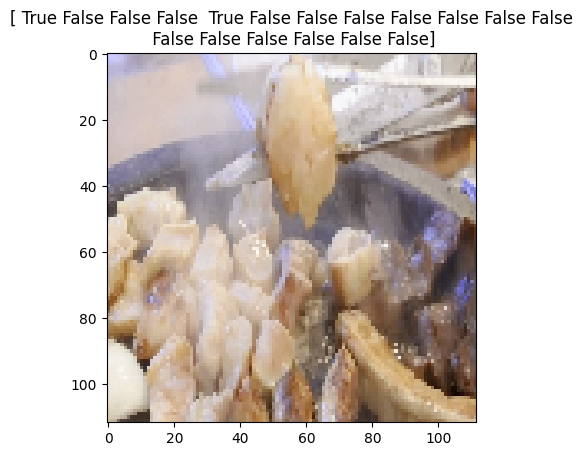

In [23]:
len(train_generator)  # 298 : 9523/32
train_generator[0]  # x,y 값
# 
train_generator[0][1]
# train_generator[0]

import matplotlib.pyplot as plt
plt.imshow(train_generator[0][0][0])
plt.title(train_generator[0][1][0])

np.where(train_generator[0][1][0]==1)  # 위치 값 찾기

train_generator[0][1][0]  # img, label, label의 label

for x in np.where(train_generator[0][1][0]==1):
    print(class_col[x])

### Define Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
model.add(Flatten(input_shape = (112, 112, 3))) # (112, 112, 3) -> (112 * 112 * 3)
model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층
model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
model.add(Dense(18, activation = 'sigmoid')) # 11개의 출력을 가지는 신경망

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

### Model Train

In [25]:
model.fit(train_generator,
         steps_per_epoch=get_steps(len(train_df), batch_size),  # get_steps : epoch를 얼마나 불러올지 결정
         validation_data = val_generator,
         validation_steps=get_steps(len(val_df), batch_size),
         epochs = 5)

Epoch 1/5
130/298 [============>.................] - ETA: 21s - loss: 0.4675 - acc: 0.4287

c:\Users\user\miniconda3\envs\gpu\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


298/298 [==============================] - 49s 158ms/step - loss: 0.3833 - acc: 0.4743 - val_loss: 0.3244 - val_acc: 0.5174
Epoch 2/5
298/298 [==============================] - 45s 152ms/step - loss: 0.2964 - acc: 0.5305 - val_loss: 0.3176 - val_acc: 0.5178
Epoch 3/5
298/298 [==============================] - 45s 149ms/step - loss: 0.2842 - acc: 0.5486 - val_loss: 0.2862 - val_acc: 0.5594
Epoch 4/5
298/298 [==============================] - 45s 151ms/step - loss: 0.2730 - acc: 0.5683 - val_loss: 0.2858 - val_acc: 0.5409
Epoch 5/5
298/298 [==============================] - 46s 153ms/step - loss: 0.2638 - acc: 0.5829 - val_loss: 0.3038 - val_acc: 0.5124


### Evaluate Model

In [26]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=base,
    x_col='list',
    y_col=class_col,
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

loss_and_metrics = model.evaluate(test_generator,
                                  steps=get_steps(len(test_df), batch_size))
print('loss_and_metrics : ' + str(loss_and_metrics)) 


Found 2977 validated image filenames.
39/94 [===========>..................] - ETA: 6s - loss: 0.2977 - acc: 0.5337

c:\Users\user\miniconda3\envs\gpu\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - 11s 120ms/step - loss: 0.3006 - acc: 0.5220
loss_and_metrics : [0.30060961842536926, 0.5220020413398743]


### Save Model

In [27]:
import os

save_path = os.path.join('model', 'img_generator_model_k-food.h5')
model.save(save_path)

### Predict

In [28]:
######################### 테스트 추가

preds=model.predict(test_generator)
preds

array([[0.22337408, 0.01051661, 0.5147817 , ..., 0.02931423, 0.04320261,
        0.01153205],
       [0.18418646, 0.05472681, 0.5849111 , ..., 0.06958138, 0.10391627,
        0.07031618],
       [0.32616332, 0.02101192, 0.361758  , ..., 0.01813465, 0.10481365,
        0.00667089],
       ...,
       [0.01943813, 0.00280954, 0.9449529 , ..., 0.03359005, 0.00721608,
        0.00217643],
       [0.16979724, 0.40027323, 0.18073669, ..., 0.06718008, 0.06582599,
        0.01641569],
       [0.2642632 , 0.00240808, 0.85391307, ..., 0.01522924, 0.04819534,
        0.00424426]], dtype=float32)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


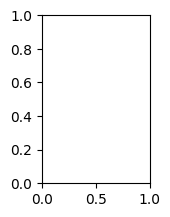

In [59]:
import cv2

do_preds = preds[:8]

for i, pred in enumerate(do_preds):
    plt.subplot(2, 4, i + 1)
    prob = zip(class_col, list(pred))
    # item --> prob
    # contributor: '뱅커'님
    prob = sorted(list(prob), key = lambda z: z[1], reverse = True)[:2]

    image = cv2.imread(base+test_df['list'][i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.title(f'{prob[0][0]}: {round(prob[0][1] * 100, 2)}% \n {prob[1][0]}: {round(prob[1][1] * 100, 2)}%')

plt.tight_layout()

TypeError: Argument 'flags' is required to be an integer

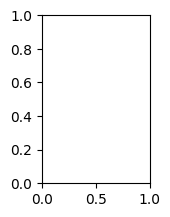

In [58]:
import cv2

do_preds = preds[:8]

for i, pred in enumerate(do_preds):
    plt.subplot(2, 4, i + 1)
    prob = zip(class_col, list(pred))
    prob = sorted(list(prob), key = lambda z: z[1], reverse = True)[:2]

    # image = cv2.imread(base+test_df['list'][i])
    image = cv2.imread(base+test_df['list'][i], np.uint8)
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.title(f'{prob[0][0]}: {round(prob[0][1] * 100, 2)}% \n {prob[1][0]}: {round(prob[1][1] * 100, 2)}%')

plt.tight_layout()


        # img_array = np.fromfile(src, np.uint8)
        # image = cv2.imdecode(img_array,cv2.IMREAD_COLOR)

In [37]:
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


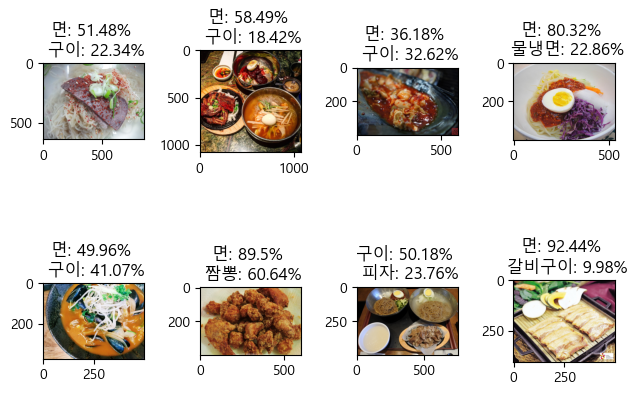

In [39]:
import cv2

do_preds = preds[:8]

for i, pred in enumerate(do_preds):
    plt.subplot(2, 4, i + 1)
    prob = zip(class_col, list(pred))
    prob = sorted(list(prob), key = lambda z: z[1], reverse = True)[:2]
    # print(prob)

    file_path = test_df['list'][i]
    # print(file_path)
    file_path = file_path.replace('\\', '/')
    
    image = np.fromfile(file_path, np.uint8)
    image = cv2.imdecode(image,cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.title(f'{prob[0][0]}: {round(prob[0][1] * 100, 2)}% \n {prob[1][0]}: {round(prob[1][1] * 100, 2)}%')


plt.tight_layout()

In [47]:
len(y1),len(y2),len(y3)

NameError: name 'y1' is not defined

In [ ]:
y1[20000:20010],y2[20000:20010]

([], [])

In [ ]:
import pandas as pd

food_df = pd.DataFrame(y1, columns=['masterCategory'])
food_df['subCategory'] = y2
food_df['image_ID'] = y3
food_df.to_csv('k-food.csv', index=False)

## Data Load

In [ ]:
food_df.head()

,masterCategory,subCategory,image_ID
0,구이,갈비구이,Img_000_0000.jpg
1,구이,갈비구이,Img_000_0001.jpg
2,구이,갈비구이,Img_000_0002.jpg
3,구이,갈비구이,Img_000_0003.jpg
4,구이,갈비구이,Img_000_0004.jpg


In [ ]:
len(food_df)

14881

In [ ]:
for cnt,name in enumerate(food_df.image_ID):
        src=str(data_dir+'/'+y1[cnt]+'/'+y2[cnt]+'/'+name)
        print(src)

c:/data/kfood/구이/갈비구이/Img_000_0000.jpg
c:/data/kfood/구이/갈비구이/Img_000_0001.jpg
c:/data/kfood/구이/갈비구이/Img_000_0002.jpg
c:/data/kfood/구이/갈비구이/Img_000_0003.jpg
c:/data/kfood/구이/갈비구이/Img_000_0004.jpg
c:/data/kfood/구이/갈비구이/Img_000_0005.jpg
c:/data/kfood/구이/갈비구이/Img_000_0006.jpg
c:/data/kfood/구이/갈비구이/Img_000_0007.jpg
c:/data/kfood/구이/갈비구이/Img_000_0008.jpg
c:/data/kfood/구이/갈비구이/Img_000_0009.jpg
c:/data/kfood/구이/갈비구이/Img_000_0010.jpg
c:/data/kfood/구이/갈비구이/Img_000_0011.jpg
c:/data/kfood/구이/갈비구이/Img_000_0012.jpg
c:/data/kfood/구이/갈비구이/Img_000_0013.jpg
c:/data/kfood/구이/갈비구이/Img_000_0014.jpg
c:/data/kfood/구이/갈비구이/Img_000_0015.jpg
c:/data/kfood/구이/갈비구이/Img_000_0016.jpg
c:/data/kfood/구이/갈비구이/Img_000_0017.jpg
c:/data/kfood/구이/갈비구이/Img_000_0018.jpg
c:/data/kfood/구이/갈비구이/Img_000_0019.jpg
c:/data/kfood/구이/갈비구이/Img_000_0020.jpg
c:/data/kfood/구이/갈비구이/Img_000_0021.jpg
c:/data/kfood/구이/갈비구이/Img_000_0022.jpg
c:/data/kfood/구이/갈비구이/Img_000_0023.jpg
c:/data/kfood/구이/갈비구이/Img_000_0024.jpg
c:/data/kfood/구이/갈비구이/Img

In [ ]:
data = []

from tensorflow.keras.preprocessing.image import img_to_array
import cv2

IX = 140
IY = 140

# for cnt,name in enumerate(df.image_ID):
#     path = data_dir+str(df.masterCategory[cnt])+'/'+str(df.subCategory[cnt])+'/'+df.image_ID
    
#     img_array = np.fromfile(path, np.uint8)
#     img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
#     image = cv2.resize(img, (img_height,img_width) )
#     image = img_to_array(image)
#     data.append(image)

# for cnt,name in enumerate(food_df.image_ID):
#         src=str(data_dir+'/'+y1[cnt]+'/'+y2[cnt]+'/'+name)
#         img_array = np.fromfile(src, np.uint8)
#         image = cv2.imdecode(img_array,cv2.IMREAD_COLOR)
#         image = cv2.resize(image, (IX,IY))
#         #plt.imshow('image',image)
#         image = img_to_array(image)
#         #print('toarray ',image)

#         data.append(image)        

invalid_ids = []

for cnt,name in enumerate(food_df.image_ID):

    try:
        src=str(data_dir+'/'+y1[cnt]+'/'+y2[cnt]+'/'+name)
        img_array = np.fromfile(src, np.uint8)
        image = cv2.imdecode(img_array,cv2.IMREAD_COLOR)
        image = cv2.resize(image, (IX,IY))
        image = img_to_array(image)
        data.append(image)
        
    except: 
        # Images for certain ids are missing, so they are not added to the dataset  
        invalid_ids.append(name)

In [ ]:
print(len(invalid_ids))
print(len(data))

45
14836


In [ ]:
labels = []
used_columns=['masterCategory','subCategory']

for index, row in food_df.iterrows():
    if row['image_ID'] not in invalid_ids:

        tags = []

        for col in used_columns:
            tags.append(row[col])

        labels.append(tags)

# for index, row in food_df.iterrows():
#     if row['image_ID'] in invalid_ids:
#         continue

#     tags = []

#     for col in used_columns:
#         tags.append(row[col])

#     labels.append(tags)

In [ ]:
len(data), len(labels)

(14836, 14836)

In [ ]:
# converting data into numpy arrays

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(labels)

[['구이' '갈비구이']
 ['구이' '갈비구이']
 ['구이' '갈비구이']
 ...
 ['면' '쫄면']
 ['면' '쫄면']
 ['면' '쫄면']]


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# creating a binary vector for the input labels 
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

print(mlb.classes_)
print(labels[0])

['갈비구이' '곱창구이' '구이' '기타' '닭갈비' '라면' '막국수' '면' '물냉면' '비빔냉면' '삼겹살' '양념치킨'
 '조개구이' '짜장면' '짬뽕' '쫄면' '피자' '후라이드치킨']
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Modeling

##### Model_1

In [ ]:
data.shape, labels.shape

In [ ]:
from sklearn.model_selection import train_test_split

(X_train, X_eval, y_train, y_eval) = train_test_split(data,labels, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

inputShape = (IY, IX, 3)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten()) 

model.add(Dense(128))
model.add(Activation('sigmoid'))


out = len(mlb.classes_)

model.add(Dense(out))
model.add(Activation('sigmoid')) 
                    
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['mse'])

In [ ]:
batch = 32
E = 30

############### checkpoint ############### 
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="c:/data/model/k-food_bestmodel.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, monitor='val_loss', save_best_only=True) 

def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)
lr_scheduler_cb = tf.keras.callbacks.LearningRateScheduler(scheduler) 

#training the model 
history=model.fit(X_train,
                  y_train,
                  epochs=E,
                  verbose=1,
                  callbacks=[checkpointer,lr_scheduler_cb])

In [ ]:
import pandas as pd
hist_df=pd.DataFrame(history.history)
hist_df.head()

In [ ]:
# preds = model.predict(X_eval)
# print(preds)

In [ ]:
preds = model.predict(X_eval)

# since the predictions of the model are sigmoid, we will first binarize them to 0 or 1
pred_binarized = []

for pred in preds:
    vals = []
    for val in pred:
        if val > 0.25:
            vals.append(1)
        else:
            vals.append(0)
    pred_binarized.append(vals) 

pred_binarized = np.array(pred_binarized)   

# we convert the output vectors to the predicted labels
true_test_labels = mlb.inverse_transform(y_eval)
pred_test_labels = mlb.inverse_transform(pred_binarized)

correct = 0
wrong = 0

# Evaluating the predictions of the model

for i in range(len(y_eval)):

    true_labels = list(true_test_labels[i])

    pred_labels = list(pred_test_labels[i])

    label1 = true_labels[0]
    label2 = true_labels[1]

    if label1 in pred_labels:
        correct+=1
    else:
        wrong+=1

    if label2 in pred_labels:
        correct+=1
    else:
        wrong+=1    



print('correct: ', correct)
print('missing/wrong: ', wrong)
print('Accuracy: ',correct/(correct+wrong))

In [ ]:
for i in range(10):
    print('True labels: ',true_test_labels[i],' Predicted labels: ',pred_test_labels[i])